11490434/11490434 [==============================] - 1s 0us/step


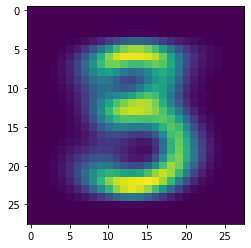

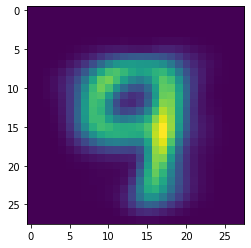

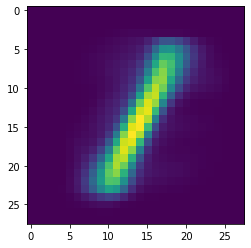

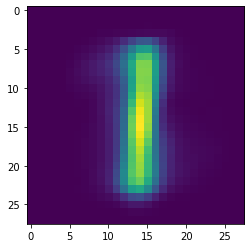

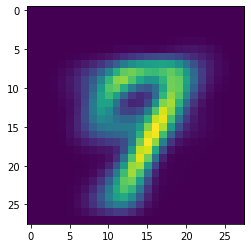

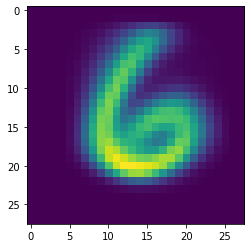

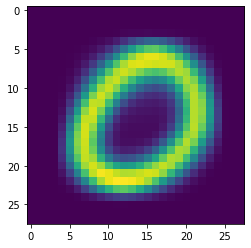

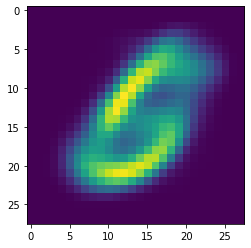

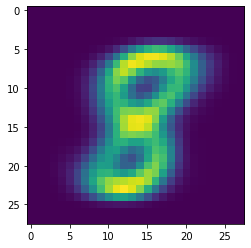

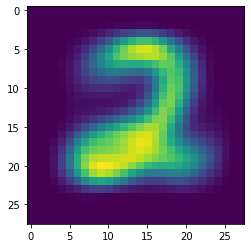

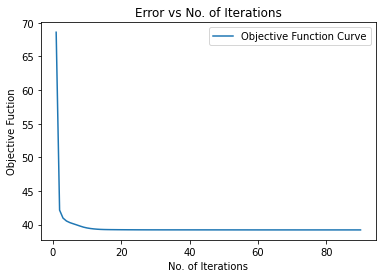

In [ ]:
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot as plt
import pandas as pd
import itertools as iter

d = 784
k = 10

########## Preprocessing the datat set ###########################
# Obtain the data set
(X_train, labels_train), (X_test, labels_test) = mnist.load_data()
#mndata = MNIST(r'/content/train-images-idx3-ubyte.gz')
#X_train, labels_train = map(np.array, mndata.load_training())
#X_test, labels_test = map(np.array, mndata.load_testing())
X_train = X_train/255.0
X_test = X_test/255.0

X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
n = X_train.shape[0]

##################################################################



######### Function to assign random centorids #########################

def random_centroids(x,k):
  centroids = []
  for i in range(k):
    # print(np.random.shuffle(x))
    row_ind = np.random.choice(x.shape[0],replace=False)
    row = x[row_ind,:]
    y_hat = i
    centroids.append(row.T)
  return (np.array(centroids))


cent = random_centroids(X_train,k)
cent = cent.T
######################################################################


# X_train_df = pd.DataFrame(X_train)
# # print(X_train_df)
# # print(np.shape(cent))


############# Implement Lloyd's algorithm #########################
converge = True
tot_dist = []
dist = np.zeros((n,k))
it = 0
iter = []
cc = []
while converge!=d:
  cent_old = cent
  y_hat = []
  #dist = np.apply_along_axis(lambda u: ((X_train - u)**2).sum(axis=1),0,cent) # find distance between each data point and each cluster centroid
  for i in range(10):
    cent1 = cent[:,i].reshape(d,1)
    cent2 = np.dot(cent1,np.ones((1,n))).T
    dist[:,i] = np.linalg.norm((X_train - cent2),ord=2,axis=1)**2

  y_hat = np.argmin(dist,axis=1) # cluster assignment
  c = np.mean(np.min(dist,axis=1),axis=0)
  # print(c)
  cc.append(c)



#####################################################################
  # Update Step
  new_cent = []
  for g in range(k):
    sum = []
    for h in range(n):
      if y_hat[h] == g:
        sum.append(X_train[h])
    sum = np.array(sum)
    o = np.mean(sum,axis=0)
    # sum = np.mean(sum,axis=0)
    new_cent.append(o)

  cent = np.array(new_cent)
  cent = cent.T

  # for i in range(10):
  #   ind = np.argwhere(y_hat == i).flatten()
  #   cent[:,i] = np.mean(X_train[ind],axis=0)
#####################################################################

  it = it + 1

  iter.append(it)

  #Checking error
  # err = 0
  # for u in range(n):
  #   if y_hat[u] != labels_train[u]:
  #     err = err+1
  # print(err*100/n)

  #Convergence checking
  converge = 0
  for h in range(len(cent)):
    if np.linalg.norm(cent[h] - cent_old[h]) <= 0.001:
      converge = converge + 1

############# Print Centroid ######################


for i in range(k):

  im = cent.T[i]
  im = np.reshape(im,(28,28))
  plt.imshow(im)
  plt.show()


plt.plot(iter,cc,label='Objective Function Curve')
plt.legend()
plt.xlabel('No. of Iterations')
plt.ylabel('Objective Fuction')
plt.title('Error vs No. of Iterations')
plt.show()
















